 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [399]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [400]:
# CREATE A PATH TO THE FILE
csvpath_1 = Path("C:/Users/navpr/Documents/Fintech Bootcamp!/Week 4/Challenge/Starter_Code/Starter_Code/Resources/whale_returns.csv")

In [401]:
# CREATE A DATAFRAME FROM THE CSV FILE
whale_dataframe = pd.read_csv(csvpath_1, index_col = "Date", infer_datetime_format = True, parse_dates = True)

In [402]:
# Reading whale returns

## IDENTIFY DATAFRAME DATA TYPES
whale_dataframe.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [403]:
## ASSESS DATA QUALITY BY COUNTING THE NUMBER OF ROWS
whale_dataframe.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [404]:
# Count nulls

## CHECK FOR NULLS
whale_dataframe.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [405]:
## DETERMINE PERCENTAGE OF NULL VALUES
whale_dataframe.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [406]:
## DETERMINE THE QUANTITY OF NULL VALUES
whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [407]:
# Drop nulls
whale_dataframe = whale_dataframe.dropna().copy()
whale_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [408]:
## ENSURE NULLS HAVE BEEN DROPPED
whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [409]:
# Reading algorithmic returns

# CREATE A PATH TO THE FILE
csvpath_2 = Path("C:/Users/navpr/Documents/Fintech Bootcamp!/Week 4/Challenge/Starter_Code/Starter_Code/Resources/algo_returns.csv")

# CREATE A DATAFRAME FROM THE CSV FILE
algo_dataframe = pd.read_csv(csvpath_2, index_col = "Date", infer_datetime_format = True, parse_dates = True)

## IDENTIFY DATAFRAME DATA TYPES
algo_dataframe.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [410]:
## ASSESS DATA QUALITY BY COUNTING THE NUMBER OF ROWS
algo_dataframe.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [411]:
# Count nulls

## CHECK FOR NULLS
algo_dataframe.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [412]:
## DETERMINE PERCENTAGE OF NULL VALUES
algo_dataframe.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [413]:
## DETERMINE THE QUANTITY OF NULL VALUES
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [414]:
# Drop nulls

algo_dataframe = algo_dataframe.dropna().copy()
algo_dataframe

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [415]:
## ENSURE NULLS HAVE BEEN DROPPED
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [416]:
# Reading S&P TSX 60 Closing Prices

# CREATE A PATH TO THE FILE
csvpath_3 = Path("C:/Users/navpr/Documents/Fintech Bootcamp!/Week 4/Challenge/Starter_Code/Starter_Code/Resources/sp_tsx_history.csv")

# CREATE A DATAFRAME FROM THE CSV FILE
sp_dataframe = pd.read_csv(csvpath_3, index_col = "Date", infer_datetime_format = True, parse_dates = True)

sp_dataframe.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [417]:
# Check Data Types
sp_dataframe.dtypes

Close    object
dtype: object

In [418]:
# Fix Data Types

## REMOVE CURRENCY SYMBOLS FROM 'CLOSE'
sp_dataframe["Close"] = sp_dataframe["Close"].str.replace("$", "")
sp_dataframe["Close"] = sp_dataframe["Close"].str.replace(",", "")

## CONVERT 'CLOSE' DATA TYPE FROM OBJECT TO FLOAT
sp_dataframe["Close"] = sp_dataframe["Close"].astype("float")

## CONFIRM THAT DTYPE HAS BRRN CHANGED TO FLOAT
sp_dataframe.dtypes

C:\Users\navpr\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Close    float64
dtype: object

In [419]:
# Calculate Daily Returns

## ADD A NEW COLUMN TITLED "DAILY RETURNS" AND CALCULATE VALUES FROM CLOSE VALUES

sp_dataframe["Daily Returns"] = sp_dataframe["Close"].pct_change()

sp_dataframe

,Close,Daily Returns
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [420]:
# Drop nulls

## DETERMINE THE QUANTITY OF NULL VALUES
sp_dataframe.isnull().sum()

## DROP NULL VALUE IN 'DAILY RETURNS'
sp_dataframe = sp_dataframe.dropna().copy()
sp_dataframe

,Close,Daily Returns
Date,,
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
2012-10-09,12273.57,-0.011709
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [421]:
# Rename `Close` Column to be specific to this portfolio.
## DELETE CLOSE COLUMN
sp_dataframe = sp_dataframe.drop(columns=["Close"])

## RENAME DAILY RETURNS TO 'S&P TSX'
sp_dataframe = sp_dataframe.rename(columns={
    "Daily Returns": "S&P TSX",
})
sp_dataframe

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [422]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_dataframe = pd.concat(
    [whale_dataframe, algo_dataframe, sp_dataframe], axis = "columns", join = "inner"
)
joined_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

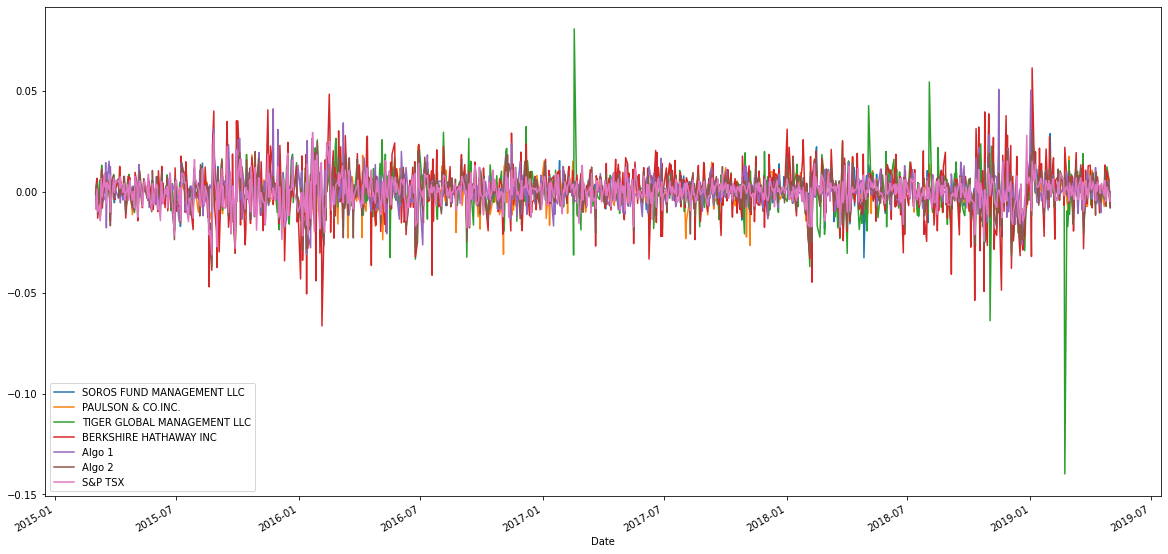

In [423]:
# Plot daily returns of all portfolios
joined_dataframe.plot(figsize = (20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

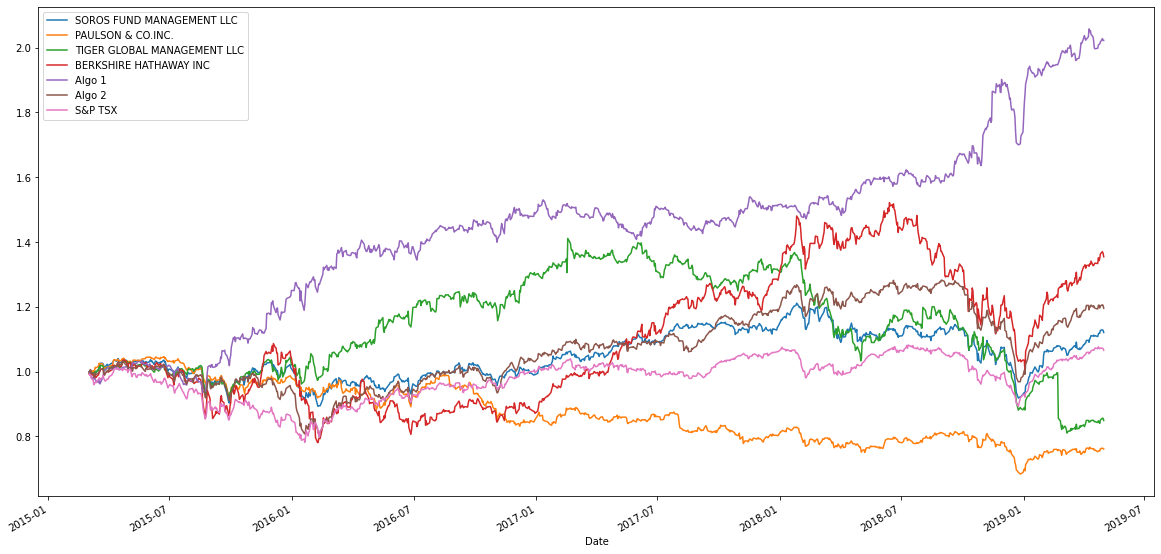

In [424]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_dataframe).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

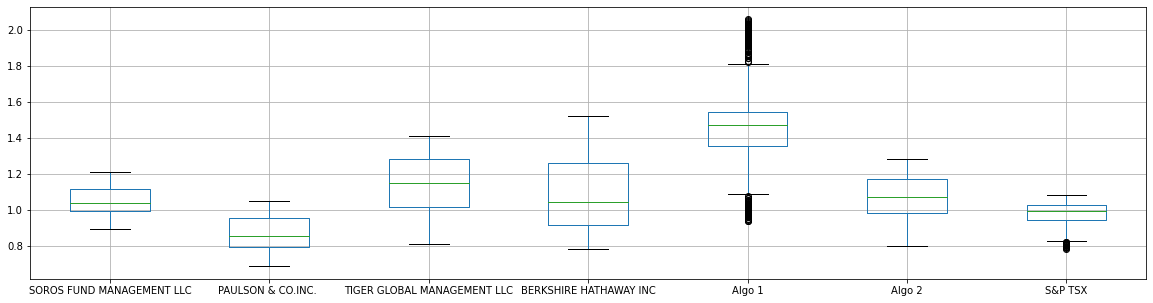

In [425]:
# Box plot to visually show risk

## WHALE DATAFRAME BOXPLOT
cumulative_returns.boxplot(figsize = (20, 5))

### Calculate Standard Deviations

In [426]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns_std = cumulative_returns.std()
cumulative_returns_std

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
S&P TSX                        0.064354
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [427]:
# Calculate the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
for x in cumulative_returns_std:
    if std > 0.064354:
        print ("More Risky than S&P TSX 60")
    elif std < 0.064354:
        print ("Less Risky than S&P TSX 60")

More Risky than S&P TSX 60
More Risky than S&P TSX 60
More Risky than S&P TSX 60
More Risky than S&P TSX 60
More Risky than S&P TSX 60
More Risky than S&P TSX 60
More Risky than S&P TSX 60


### Calculate the Annualized Standard Deviation

In [428]:
# Calculate the annualized standard deviation (252 trading days)
cumulative_returns_annualised_std = cumulative_returns_std * np.sqrt(252)
cumulative_returns_annualised_std

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
Algo 2                         1.851072
S&P TSX                        1.021582
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

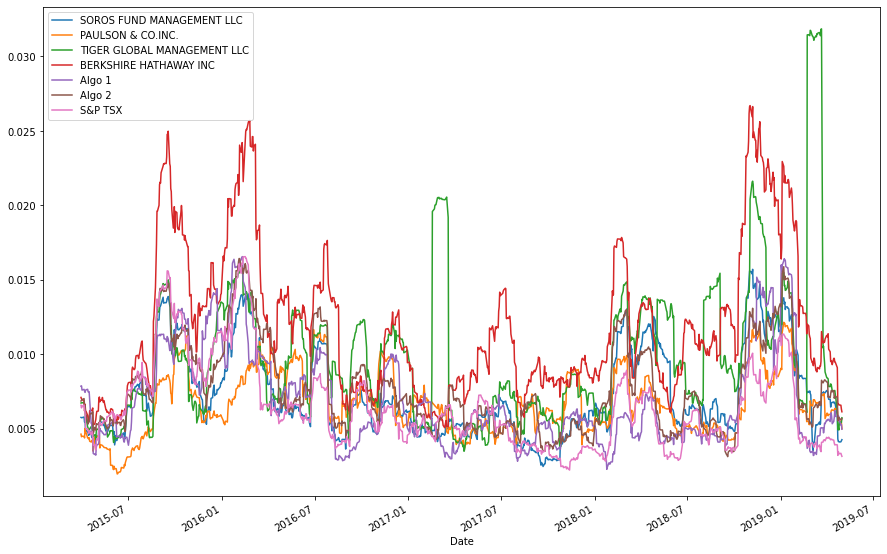

In [429]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_dataframe.rolling(window = 21).std()

# Plot the rolling standard deviation
joined_dataframe.rolling(window = 21).std().plot(figsize = (15, 10))

### Calculate and plot the correlation

In [430]:
# Calculate the correlation
correlation = joined_dataframe.corr()

# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

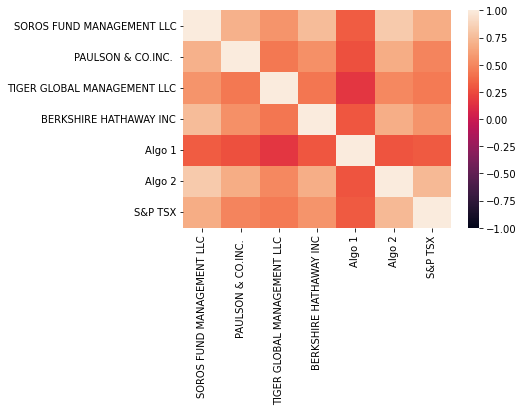

In [431]:
## (If heatmap is required)
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

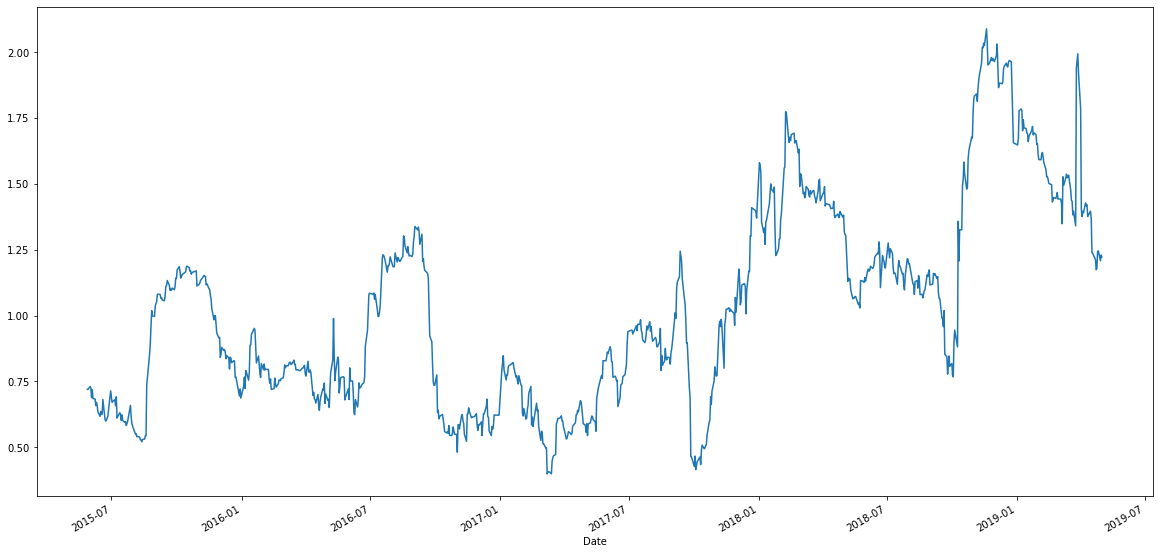

In [432]:
# Calculate covariance of a single portfolio
## Chosen portfolio = Berkshire Hathaway Inc
covariance = joined_dataframe["BERKSHIRE HATHAWAY INC"].cov(joined_dataframe["S&P TSX"])
covariance

# Calculate variance of S&P TSX
variance = joined_dataframe["S&P TSX"].var()
variance

# Computing beta
bershire_beta = covariance / variance
bershire_beta

# Plot beta trend
## 1 - CALCULATE 60 DAY ROLLING COVARIANCE BETWEEN BERKSHIRE HATHAWAY INC AND S&P TSX
rolling_covariance = joined_dataframe["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(joined_dataframe['S&P TSX'])

## 2 - CALCULATE 60 DAY ROLLING VARIANCE BETWEEN BERKSHIRE HATHAWAY INC AND S&P TSX
rolling_variance = joined_dataframe["S&P TSX"].rolling(window=60).var()

## 3 - CALCULATE 60 DAY ROLLING BETA OF BERKSHIRE HATHAWAY INC
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [296]:
# Use `ewm` to calculate the rolling window

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [433]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_dataframe.mean() * 252) / (joined_dataframe.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:>

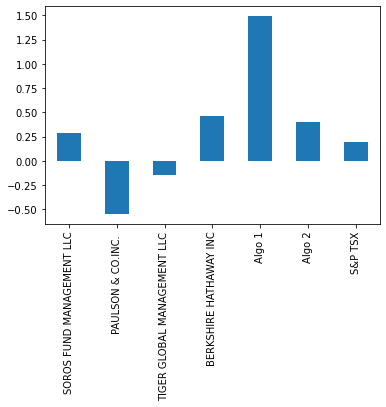

In [434]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

ANSWER:
As shown above, Algo 1 outperforms all, while Algo 2 similarly outperforms all except for Bershire Hathaway Inc which does slightly better than Algo 2

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [435]:
# Reading data from 1st stock
## READ IN DATA FROM OTEX:

## CREATE A PATH TO THE FILE
csvpath_4 = Path("C:/Users/navpr/Documents/Fintech Bootcamp!/Week 4/Challenge/Starter_Code/Starter_Code/Resources/otex_historical.csv")

# CREATE A DATAFRAME FROM THE CSV FILE
otex_dataframe = pd.read_csv(csvpath_4, index_col = "Date", infer_datetime_format = True, parse_dates = True)

# RENAME 'CLOSE' TO 'OTEX' AND DROP 'SYMBOL' COLUMN
otex_dataframe = otex_dataframe.rename(columns={
    "Close": "OTEX",
})

otex_dataframe = otex_dataframe.drop(columns=["Symbol"])

In [436]:
# Reading data from 2nd stock
## READ IN DATA FROM L:

## CREATE A PATH TO THE FILE
csvpath_5 = Path("C:/Users/navpr/Documents/Fintech Bootcamp!/Week 4/Challenge/Starter_Code/Starter_Code/Resources/l_historical.csv")

# CREATE A DATAFRAME FROM THE CSV FILE
l_dataframe = pd.read_csv(csvpath_5, index_col = "Date", infer_datetime_format = True, parse_dates = True)

# RENAME 'CLOSE' TO 'l' AND DROP 'SYMBOL' COLUMN
l_dataframe = l_dataframe.rename(columns={
    "Close": "l",
})

l_dataframe = l_dataframe.drop(columns=["Symbol"])

In [437]:
# Reading data from 3rd stock
## READ IN DATA FROM SHOP:

## CREATE A PATH TO THE FILE
csvpath_6 = Path("C:/Users/navpr/Documents/Fintech Bootcamp!/Week 4/Challenge/Starter_Code/Starter_Code/Resources/shop_historical.csv")

# CREATE A DATAFRAME FROM THE CSV FILE
shop_dataframe = pd.read_csv(csvpath_6, index_col = "Date", infer_datetime_format = True, parse_dates = True)

# RENAME 'CLOSE' TO 'SHOP' AND DROP 'SYMBOL' COLUMN
shop_dataframe = shop_dataframe.rename(columns={
    "Close": "SHOP",
})

shop_dataframe = shop_dataframe.drop(columns=["Symbol"])

In [438]:
# Combine all stocks in a single DataFrame
joined_personal_dataframe = pd.concat(
    [otex_dataframe, l_dataframe, shop_dataframe], axis = "columns", join = "inner"
)
joined_personal_dataframe

,OTEX,l,SHOP
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51
...,...,...,...
2019-12-20,58.68,67.90,513.22
2019-12-23,57.89,67.68,511.62
2019-12-24,57.44,67.67,525.39


In [439]:
# Reset Date index


In [440]:
# Reorganize portfolio data by having a column per symbol


In [441]:
# Calculate daily returns
joined_personal_dataframe["OTEX"] = joined_personal_dataframe["OTEX"].pct_change()
joined_personal_dataframe["l"] = joined_personal_dataframe["l"].pct_change()
joined_personal_dataframe["SHOP"] = joined_personal_dataframe["SHOP"].pct_change()

# Drop NAs
joined_personal_dataframe = joined_personal_dataframe.dropna().copy()

# Display sample data
joined_personal_dataframe.head()

,OTEX,l,SHOP
Date,,,
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392
2018-01-09,-0.000712,0.008969,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [442]:
# Set weights
otex_weight = 1/3
l_weight = 1/3
shop_weight = 1/3

# Calculate portfolio return
portfolio_returns=otex_weight*joined_personal_dataframe["OTEX"]+l_weight*joined_personal_dataframe["l"]+shop_weight*joined_personal_dataframe["SHOP"]

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [443]:
# Join your returns DataFrame to the original returns DataFrame
final_dataframe = pd.concat(
    [portfolio_returns, joined_dataframe], axis = "columns", join = "inner"
)

In [444]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

## There are no null values:
final_dataframe.isnull().sum()

0                              0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [445]:
# Calculate the annualized `std`

## 1 - CALCULATE THE DAILY STANDARD DEVIATION
joined_personal_dataframe_std = joined_personal_dataframe.std()

## 2 - CALCULATE ANNUALISED STANDARD DEVIATION (252 trading days)
joined_personal_dataframe_annualised_std = joined_personal_dataframe_std * np.sqrt(252)
joined_personal_dataframe_annualised_std

OTEX    0.215132
l       0.152369
SHOP    0.488717
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

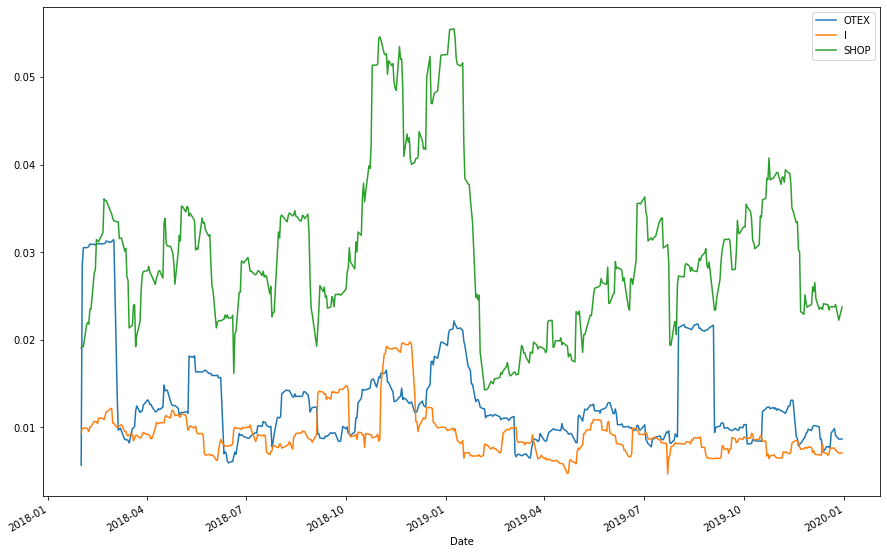

In [446]:
# Calculate rolling standard deviation
joined_personal_dataframe.rolling(window = 21).std()

# Plot rolling standard deviation
joined_personal_dataframe.rolling(window = 21).std().plot(figsize = (15, 10))

### Calculate and plot the correlation

<AxesSubplot:>

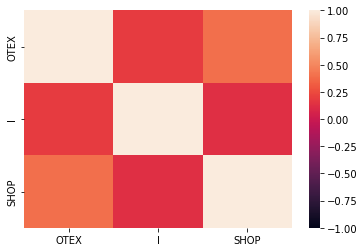

In [447]:
# Calculate and plot the correlation

correlation = joined_personal_dataframe.corr()

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

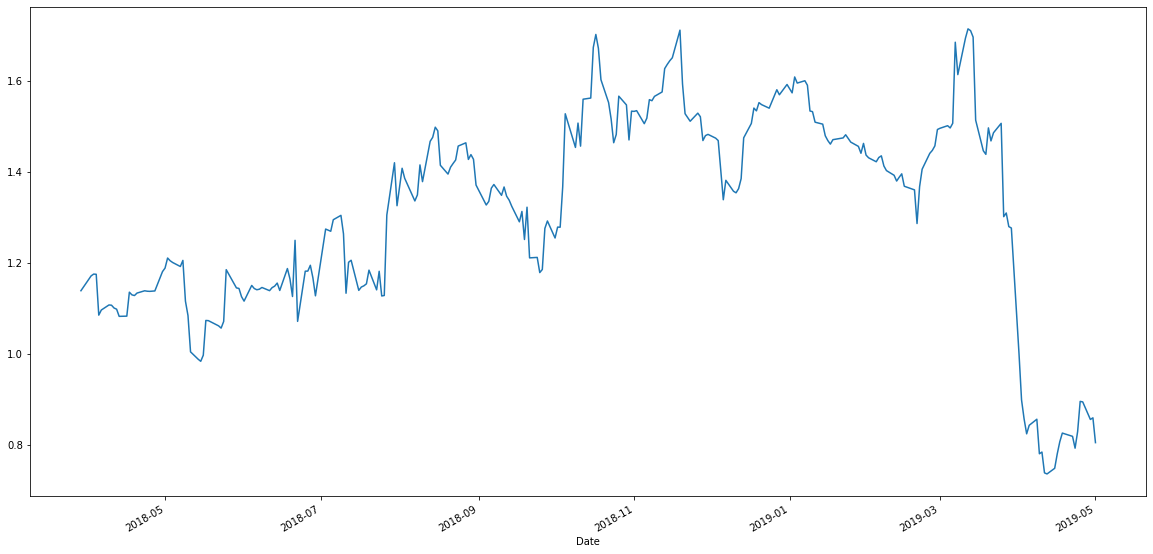

In [448]:
# Calculate and plot Beta

# CALCULATE COVARIANCE OF PERSONAL PORTFOLIO
covariance = final_dataframe[int("0")].cov(final_dataframe["S&P TSX"])
covariance

# CALCULATE VARIANCE OF S&P TSX
variance = final_dataframe["S&P TSX"].var()
variance

# COMPUTE BETA
personal_beta = covariance / variance
personal_beta

# PLOT BETA TREND
## 1 - CALCULATE 60 DAY ROLLING COVARIANCE BETWEEN PERSONAL PORTFOLIO AND S&P TSX
rolling_covariance = final_dataframe[int("0")].rolling(window=60).cov(final_dataframe['S&P TSX'])

## 2 - CALCULATE 60 DAY ROLLING VARIANCE BETWEEN PERSONAL PORTFOLIO AND S&P TSX
rolling_variance = final_dataframe["S&P TSX"].rolling(window=60).var()

## 3 - CALCULATE 60 DAY ROLLING BETA OF PERSONAL PORTFOLIO
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [449]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios_final = (final_dataframe.mean() * 252) / (final_dataframe.std() * np.sqrt(252))
sharpe_ratios_final

0                              1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
dtype: float64

<AxesSubplot:>

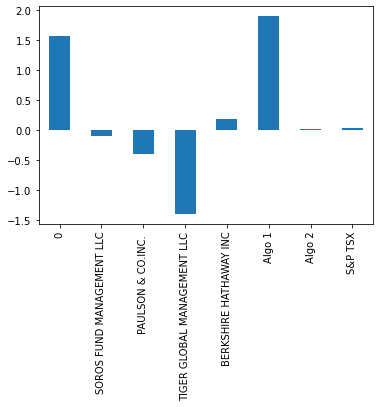

In [450]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_final.plot(kind = "bar")

### How does your portfolio do?

ANSWER = It appears that my portfolio outperforms all others, apart from 'Algo 1'